In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Import Packages

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## Set file paths for train and predict datasets

In [3]:
train_dataset = "/content/drive/My Drive/Colab Notebooks/Carnival Wars/Dataset/train.csv"
predict_dataset = "/content/drive/My Drive/Colab Notebooks/Carnival Wars/Dataset/test.csv"

## Get datasets basic info

In [4]:
train_df = pd.read_csv(train_dataset)
train_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [6]:
train_df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [7]:
train_df[train_df.duplicated()].count()

Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Customer_name       0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
dtype: int64

In [8]:
predict_df = pd.read_csv(predict_dataset)
predict_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [9]:
predict_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [10]:
predict_df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
count,3429.000000,3430.000000,3430.000000,3430.000000,3430.000000,3394.000000,3425.000000,3416.000000,3430.000000
mean,25.633421,196.693878,0.667638,49.917493,0.146356,265.484973,10.436204,3444.206089,6234.062391
std,14.389747,168.832500,1.045914,28.587214,0.353514,125.325455,4.232382,2178.418557,3575.968650
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,124.000000,163.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,162.000000,7.000000,1834.000000,3819.000000
50%,26.000000,124.000000,0.000000,50.000000,0.000000,252.000000,11.000000,3060.500000,5431.000000
75%,38.000000,358.000000,2.000000,74.000000,0.000000,319.000000,14.000000,4606.500000,7796.500000
max,50.000000,471.000000,3.000000,100.000000,1.000000,648.000000,17.000000,17182.000000,27954.000000


In [11]:
predict_df[predict_df.duplicated()].count()

Product_id          0
Stall_no            0
instock_date        0
Market_Category     0
Customer_name       0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_1           0
charges_2 (%)       0
Minimum_price       0
Maximum_price       0
dtype: int64

## Feature-wise EDA

### Stall_no: Represents the number of stalls in the carnival (1-50)



In [ ]:
train_df["Stall_no"].fillna(-1, inplace = True)
predict_df["Stall_no"].fillna(-1, inplace = True)

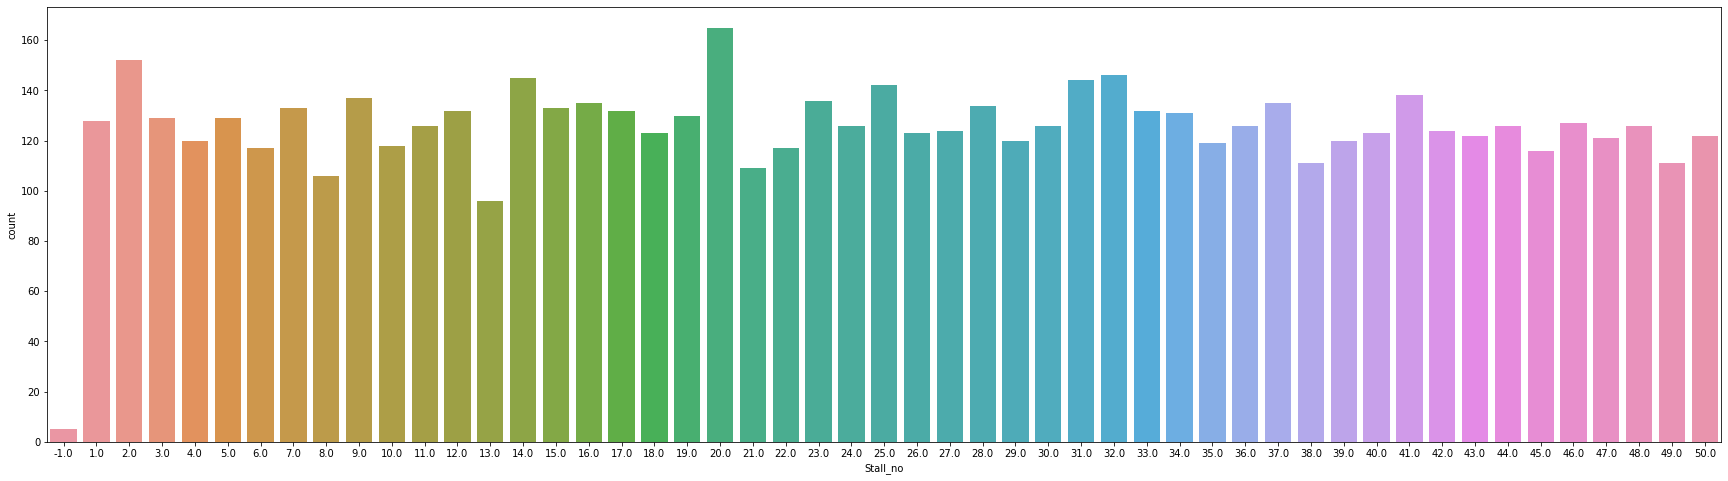

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(x="Stall_no", data=train_df)

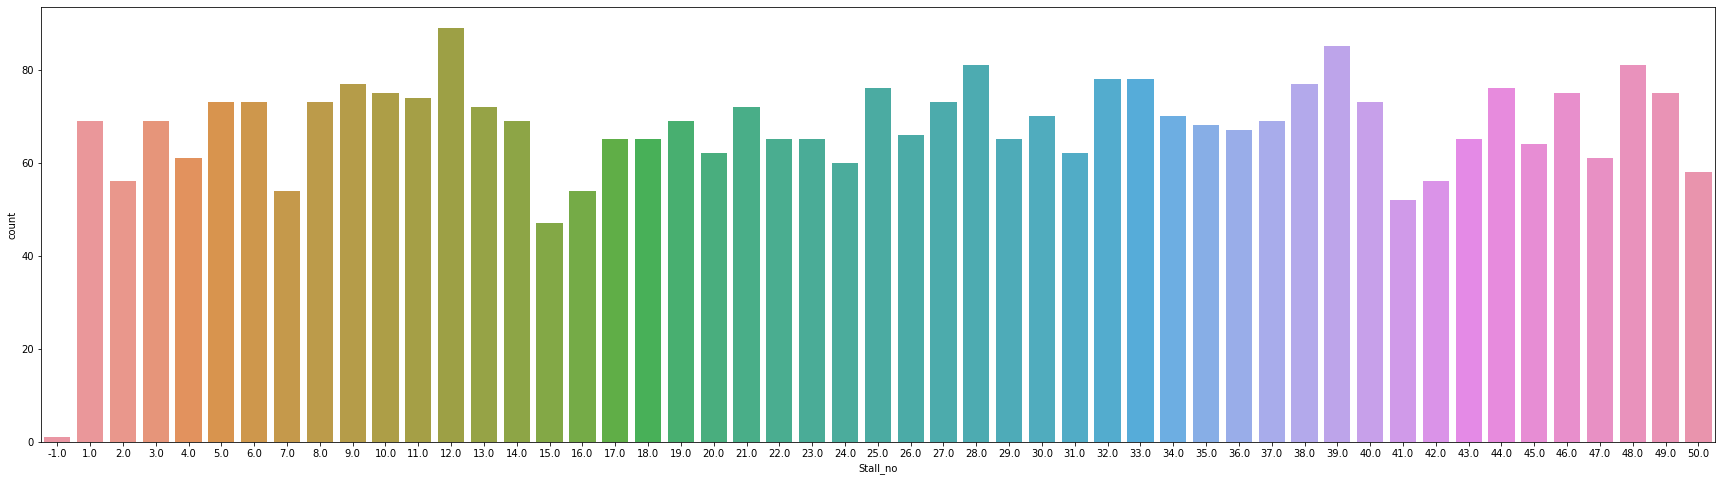

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(x="Stall_no", data=predict_df)

### Market_Category: Represents the different market categories that the products belong to

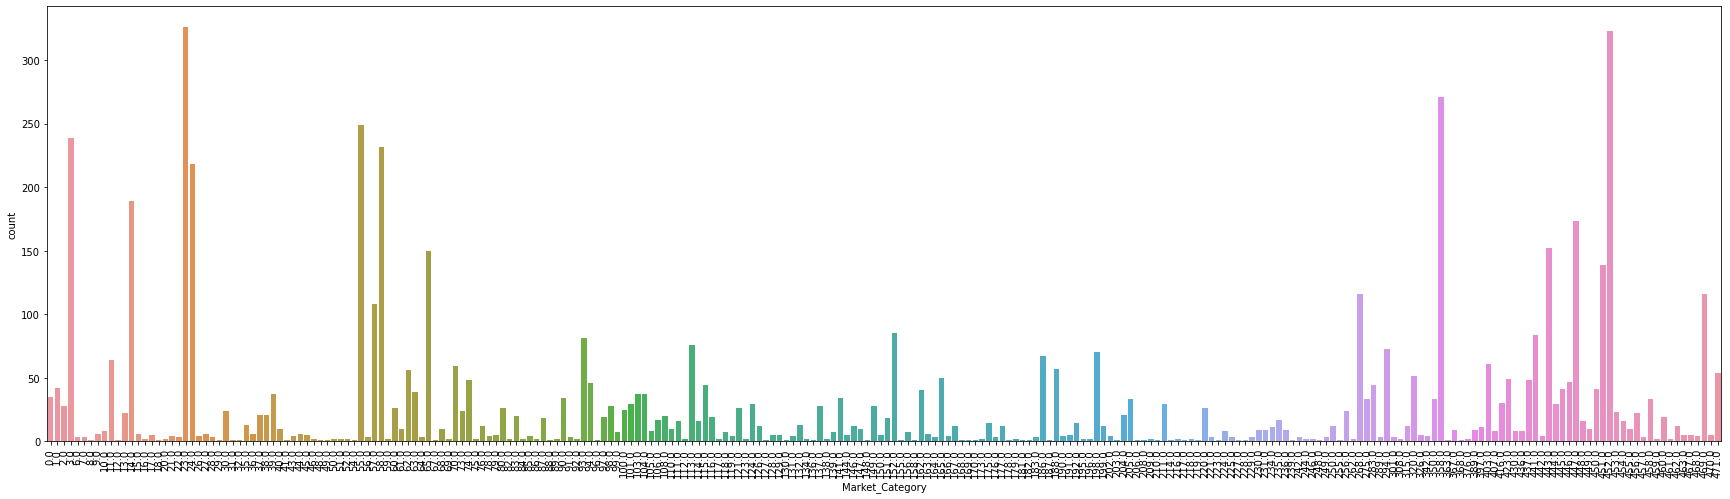

In [ ]:
plt.figure(figsize=(30, 8))
plt.xticks(rotation=90)
sns.countplot(x="Market_Category", data=train_df)

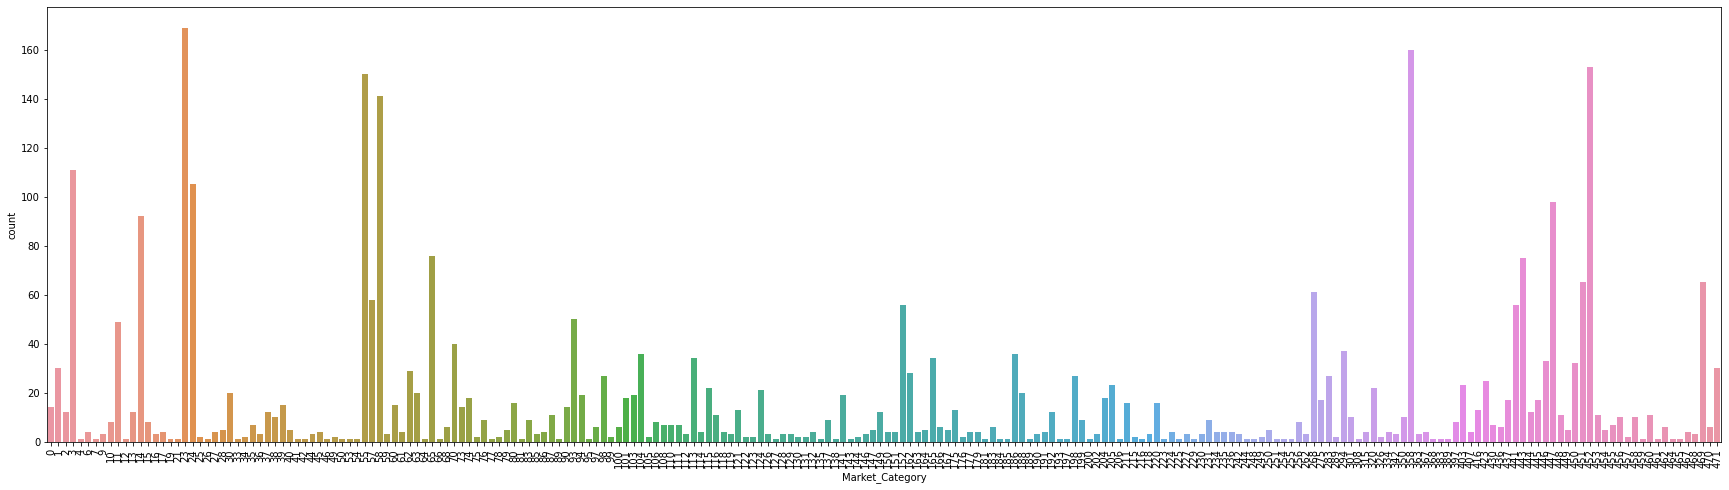

In [ ]:
plt.figure(figsize=(30, 8))
plt.xticks(rotation=90)
sns.countplot(x="Market_Category", data=predict_df)

### Loyalty_customer: Represents if a customer is a loyal customer

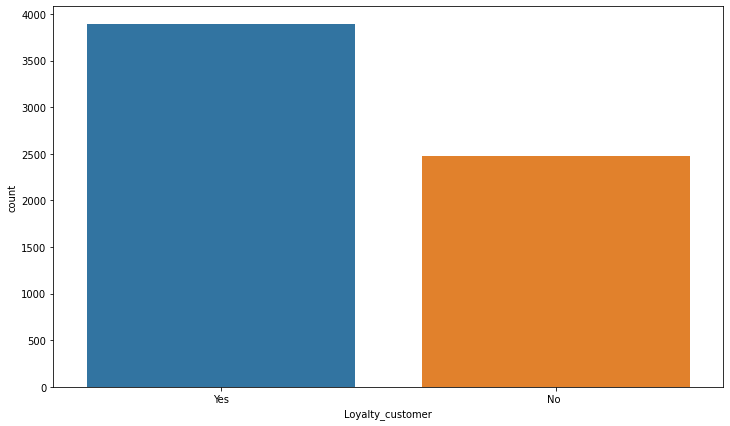

In [13]:
plt.figure(figsize=(12, 7))
sns.countplot(x="Loyalty_customer", data=train_df)

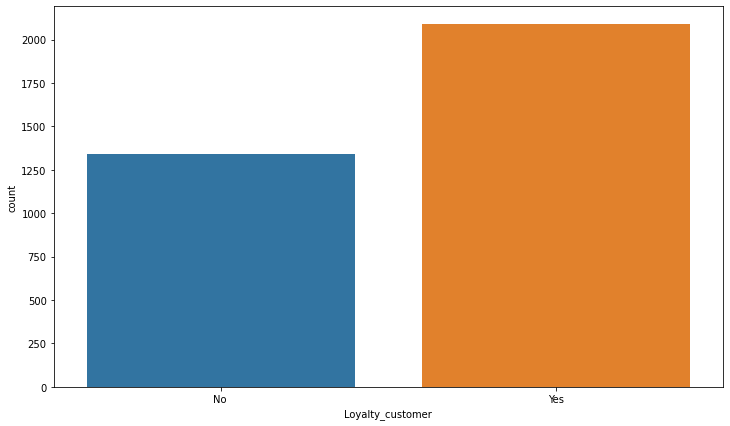

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x="Loyalty_customer", data=predict_df)

### Product_Category: Represents the 10 different product categories that the products belong to

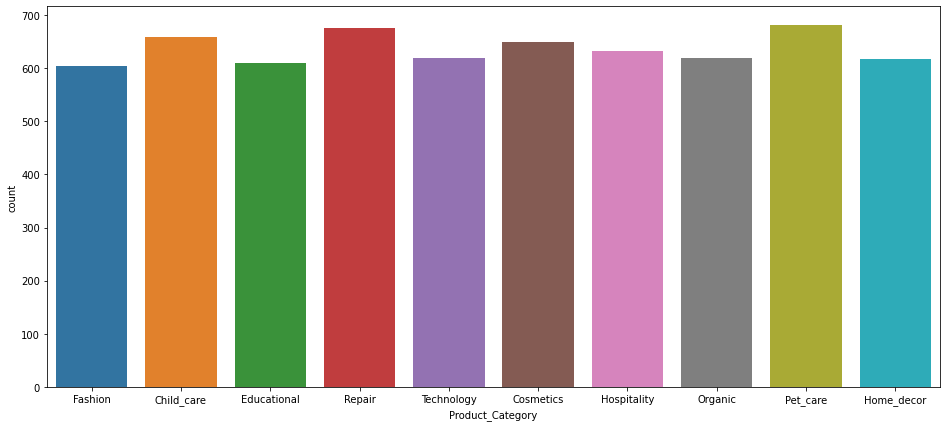

In [15]:
plt.figure(figsize=(16, 7))
sns.countplot(x="Product_Category", data=train_df)

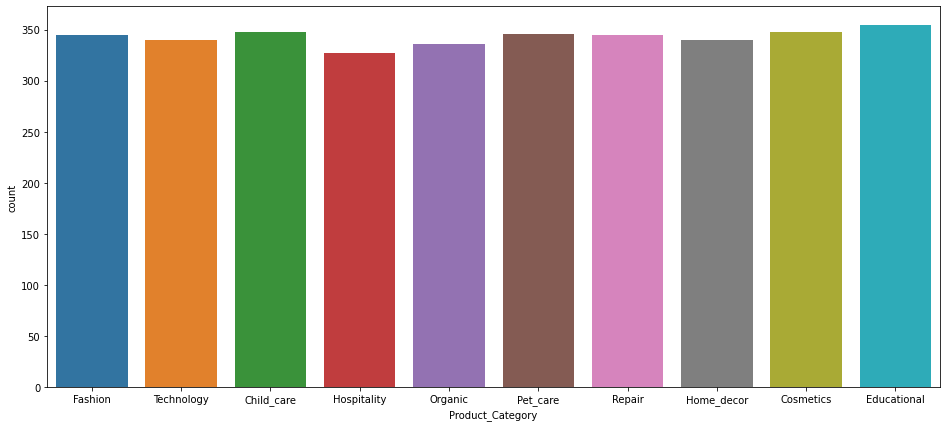

In [16]:
plt.figure(figsize=(16, 7))
sns.countplot(x="Product_Category", data=predict_df)

### Grade: Represents the quality of products

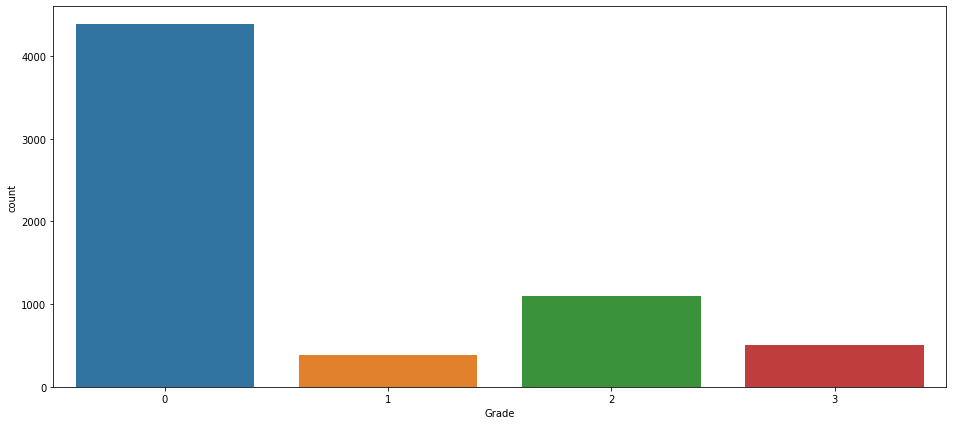

In [17]:
plt.figure(figsize=(16, 7))
sns.countplot(x="Grade", data=train_df)

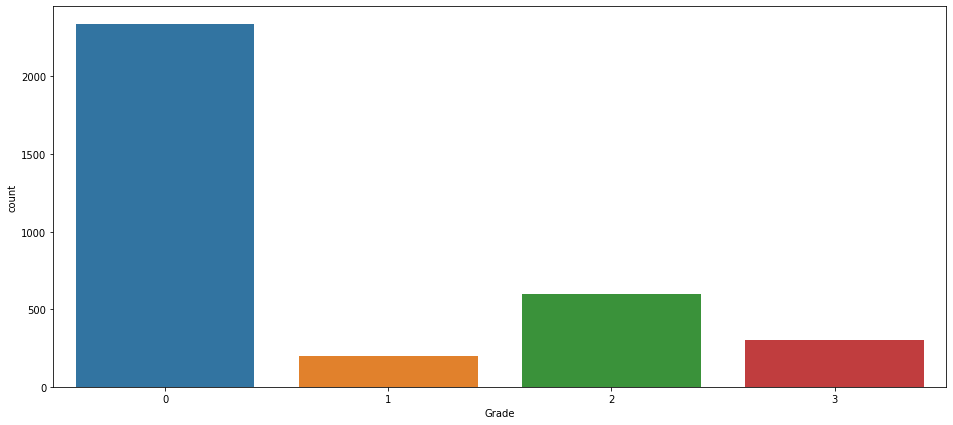

In [18]:
plt.figure(figsize=(16, 7))
sns.countplot(x="Grade", data=predict_df)

### Demand: Represents the demand for the products being sold at the carnival

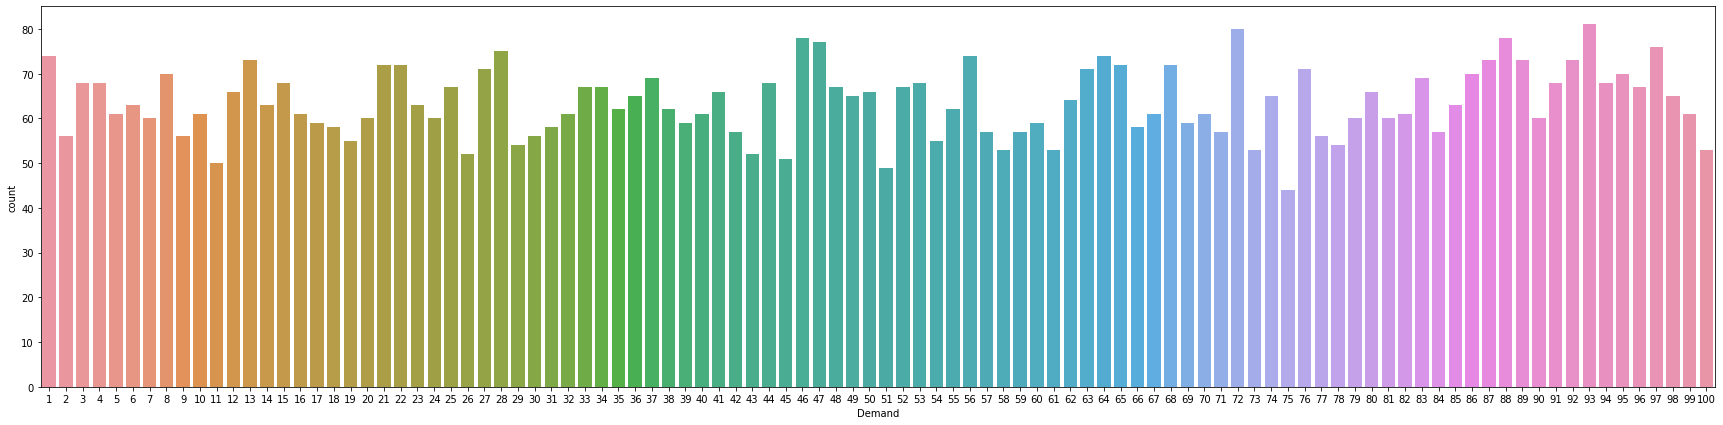

In [20]:
plt.figure(figsize=(30, 7))
sns.countplot(x="Demand", data=train_df)

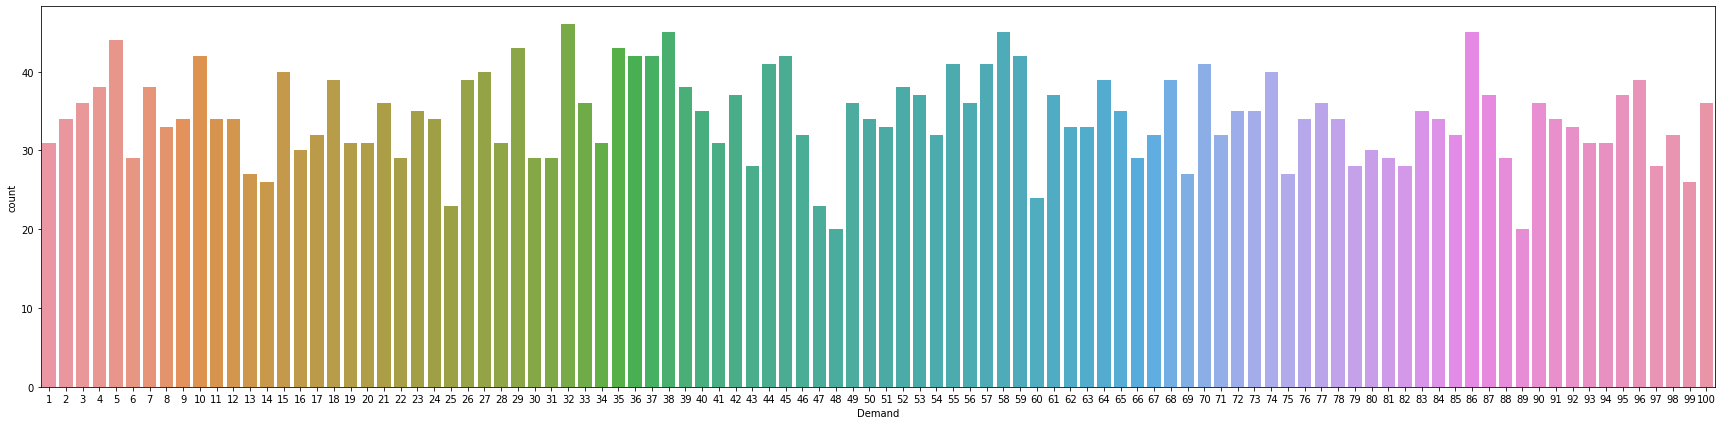

In [21]:
plt.figure(figsize=(30, 7))
sns.countplot(x="Demand", data=predict_df)

### Discount_avail: Represents whether a product is being sold at a discount or not

In [23]:
train_df["Discount_avail"].fillna(-1, inplace = True)
predict_df["Discount_avail"].fillna(-1, inplace = True)

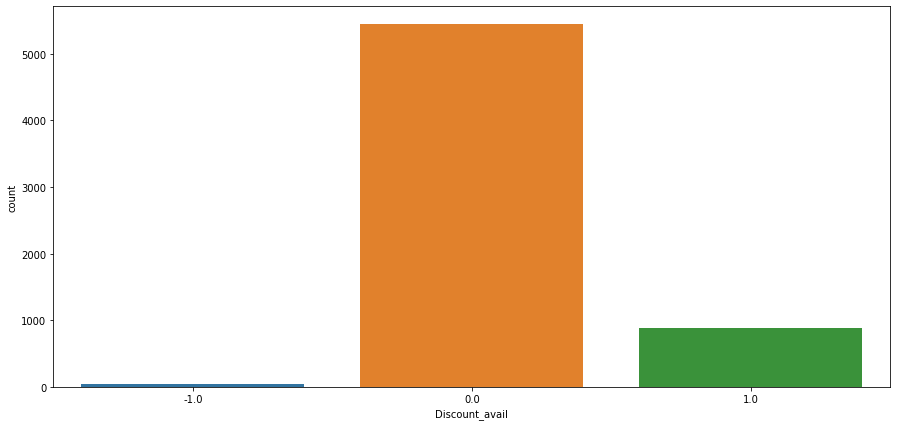

In [24]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Discount_avail", data=train_df)

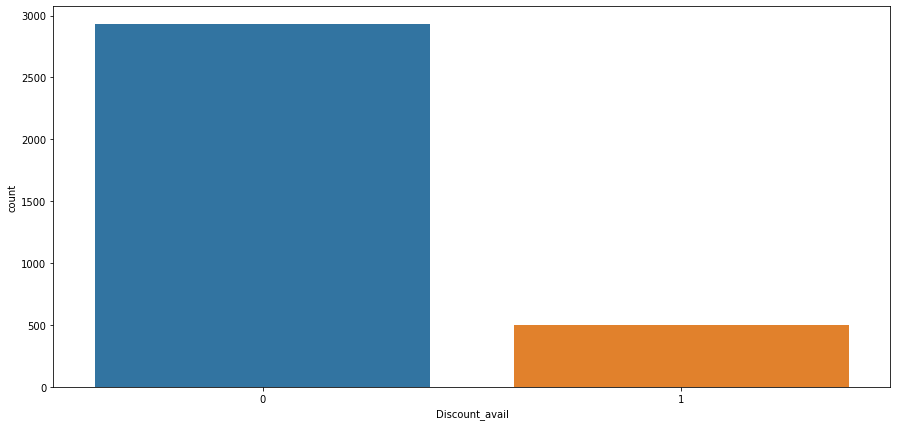

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(x="Discount_avail", data=predict_df)

### charges_1: Represents the types of charges applied on the products in the carnival

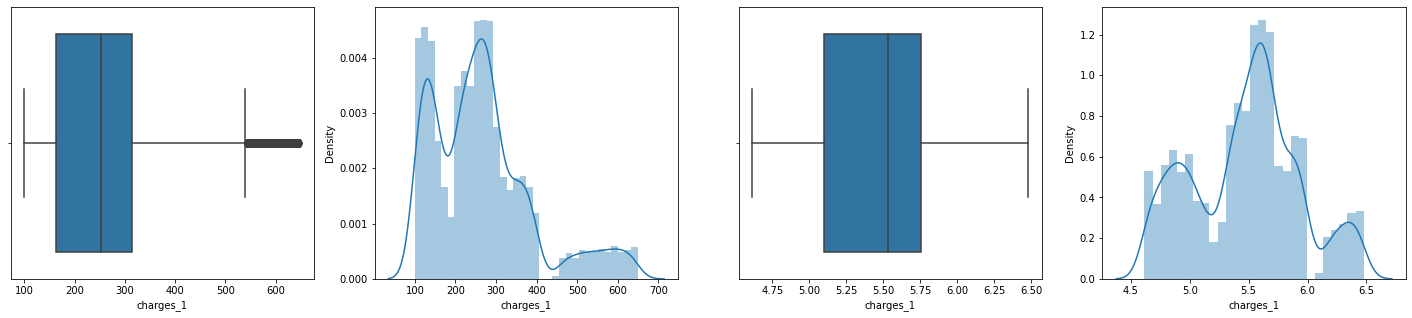

In [30]:
x = train_df['charges_1']
y = np.log1p(train_df['charges_1'])

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

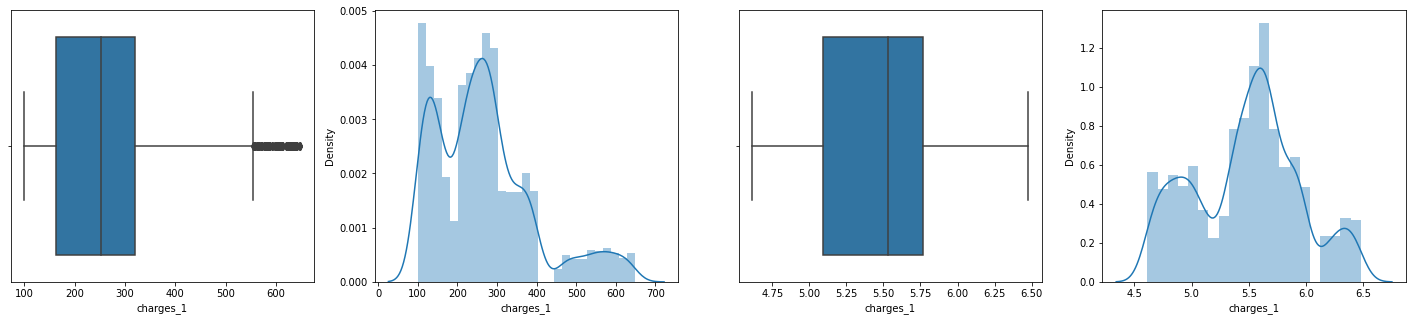

In [31]:
x = predict_df['charges_1']
y = np.log1p(predict_df['charges_1'])

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

### charges_2 (%): Represents the types of charges applied on the products in the carnival

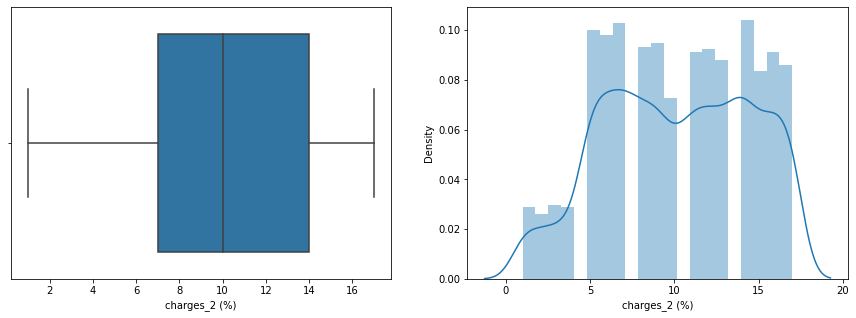

In [35]:
x = train_df['charges_2 (%)']

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])

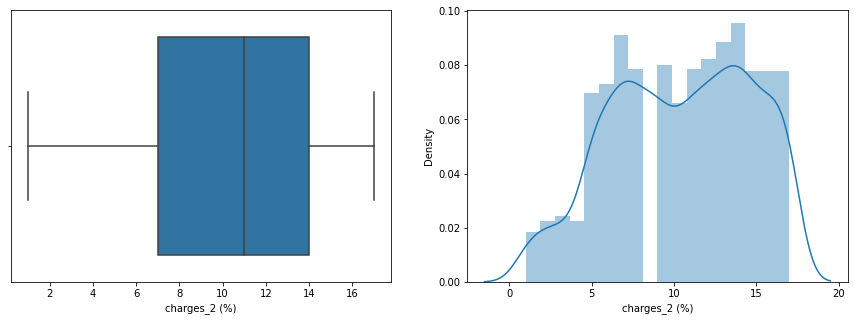

In [36]:
x = predict_df['charges_2 (%)']

_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])

In [38]:
train_df["charges_2 (%)"].fillna(-1, inplace = True)
predict_df["charges_2 (%)"].fillna(-1, inplace = True)

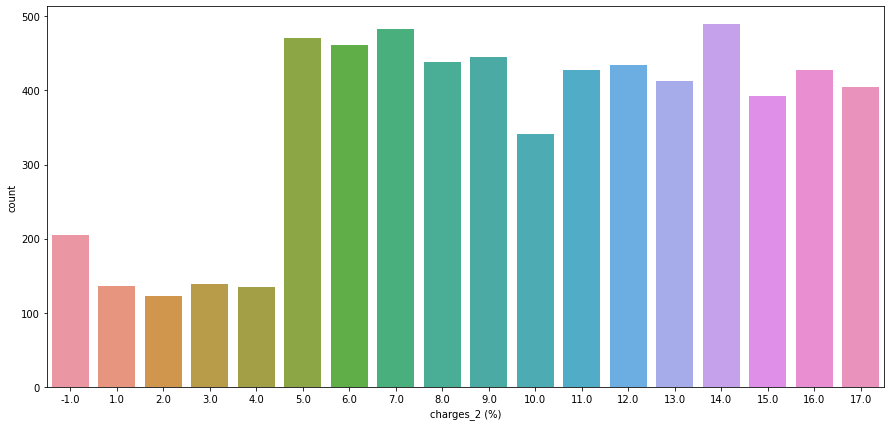

In [39]:
plt.figure(figsize=(15, 7))
sns.countplot(x="charges_2 (%)", data=train_df)

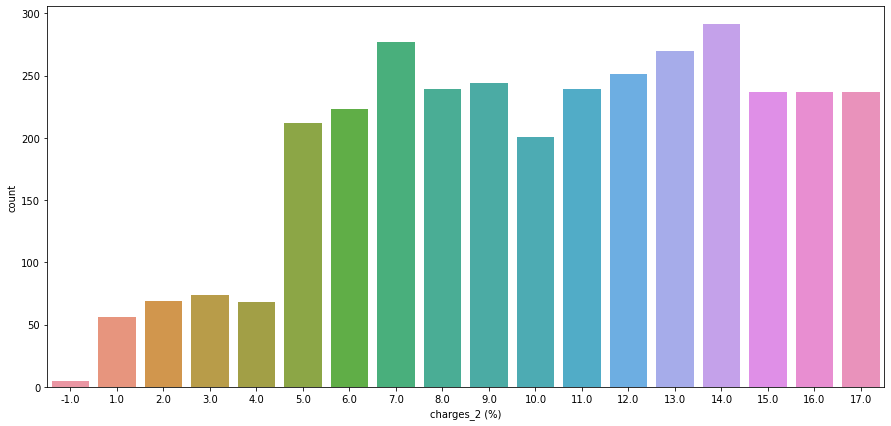

In [40]:
plt.figure(figsize=(15, 7))
sns.countplot(x="charges_2 (%)", data=predict_df)

### Minimum_price: Represents the minimum price of a product

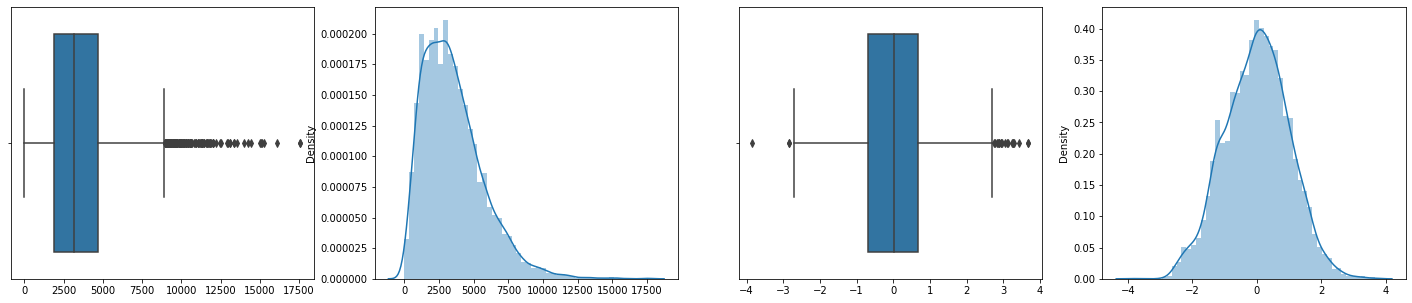

In [51]:
x = np.array([train_df['Minimum_price']]).T

pt = PowerTransformer()
pt.fit(x)
y = pt.transform(x)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

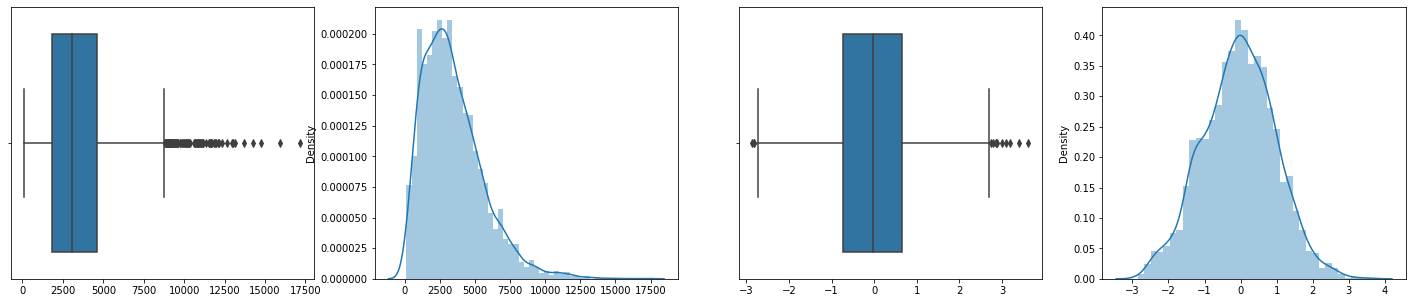

In [52]:
x = np.array([predict_df['Minimum_price']]).T
y = pt.transform(x)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

### Maximum_price: Represents the maximum price of a product

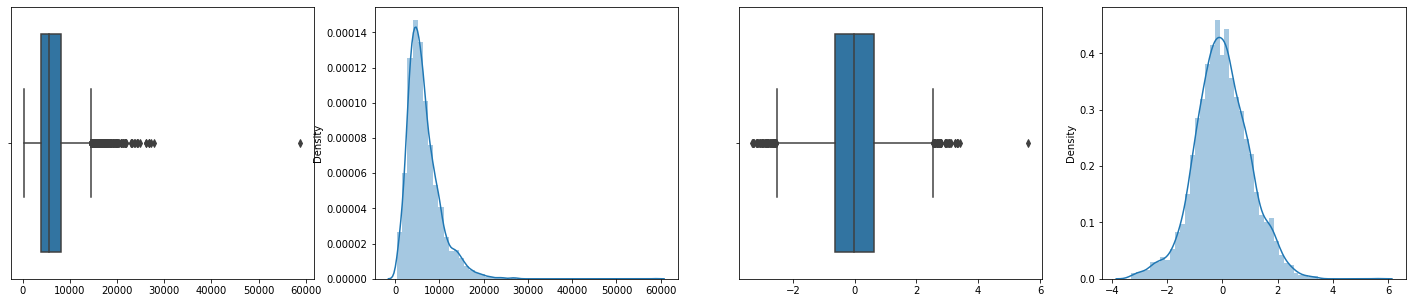

In [57]:
x = np.array([train_df['Maximum_price']]).T

pt = PowerTransformer()
pt.fit(x)
y = pt.transform(x)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

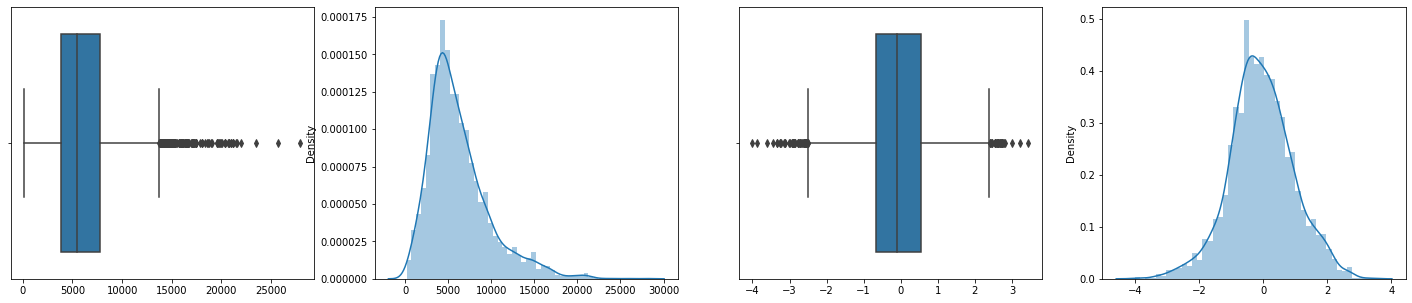

In [58]:
x = np.array([predict_df['Maximum_price']]).T
y = pt.transform(x)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

### Selling_Price: Represents the selling price of the product in the carnival

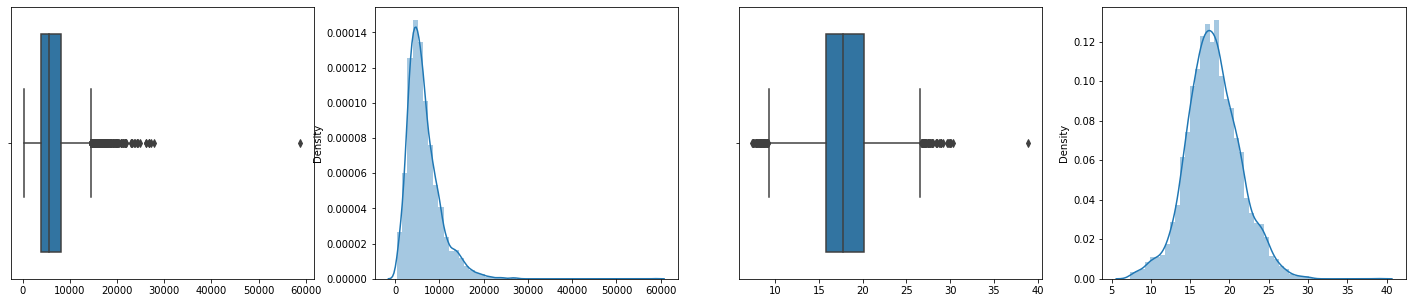

In [64]:
x = np.array([train_df['Maximum_price']]).T
y = np.cbrt(x)

_, ax = plt.subplots(1, 4, figsize=(25, 5))
sns.boxplot(x, ax=ax[0])
sns.distplot(x, ax=ax[1])
sns.boxplot(y, ax=ax[2])
sns.distplot(y, ax=ax[3])

In [71]:
train_df[train_df['Selling_Price'].isnull()].head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
64,NKCECW7BSTZBHH6R,2.0,2015-09-24 17:26:11.000,268,Tyrus,Yes,Hospitality,2,28,-1.0,340.0,9.0,945.0,2956.0,NaN
516,RNGE7M92GMQNSPUG,7.0,2015-08-15 23:12:45.000,447,Kristen,Yes,Repair,0,36,1.0,219.0,3.0,5514.0,8055.0,NaN
536,SHOEFDVVFH5WUUMN,45.0,2015-09-22 15:26:53.000,14,Olin,No,Repair,0,37,0.0,268.0,3.0,3021.0,4135.0,NaN
1037,PBXE8FW6ZZZF2RQA,39.0,2015-11-21 03:56:22.000,14,Giovonni,Yes,Repair,0,88,0.0,295.0,8.0,7314.0,NaN,NaN
1105,SHIE9J6P8QHDZWXF,27.0,2015-09-23 14:25:52.000,198,Donavan,Yes,Technology,0,91,0.0,594.0,13.0,2138.0,3167.0,NaN


## Features Correlation

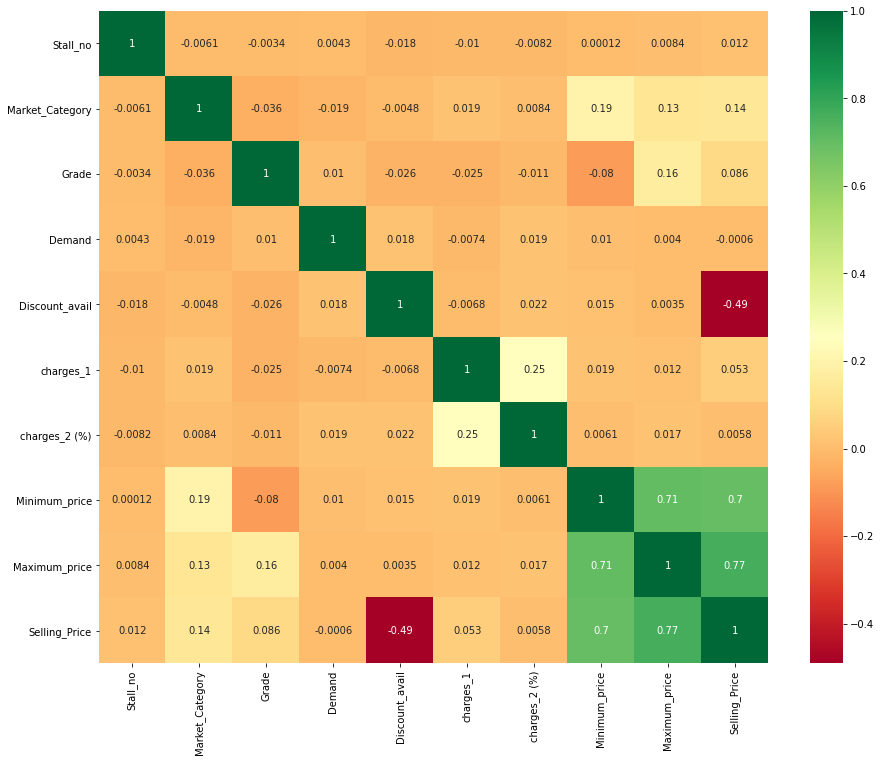

In [67]:
x = train_df[['Stall_no','Market_Category','Loyalty_customer','Product_Category',
              'Grade','Demand','Discount_avail','charges_1','charges_2 (%)',
              'Minimum_price','Maximum_price','Selling_Price']]
plt.subplots(1,1,figsize=(15,12))
sns.heatmap(x.corr(),annot=True,cmap="RdYlGn")